# importing the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.decomposition import PCA

df = pd.read_csv('./Macrodata_raw.csv')
df.drop(["Regime","Unnamed: 0"], axis=1, inplace = True) #gets rid of column with string value for recession indicator

In [2]:
first_column = df.pop("Regime in 0 = Normal & 1 = Recession") #moves the dependent variable column to the beginning of the data table
df.insert(0, "Regime in 0 = Normal & 1 = Recession", first_column)

In [3]:
variables_tested = df.drop(labels=["Regime in 0 = Normal & 1 = Recession"], axis=1)   # new object for colinearity 
variables_tested.head() 

,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,EXCAUS,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,P/E,Dividend Yield
0,8909.327,74.6841,125125,5.6,118316,23196,23947,1467,1387,63.691,...,1.3669,1.5288,129.7,125.5,154.7,636.020020,1059.790039,20.754421,18.6845,2.26
1,8983.863,75.8344,125639,5.5,118739,23280,23988,1491,1420,64.180,...,1.3752,1.5360,129.7,125.0,155.0,640.429993,1100.050049,21.372637,18.8140,2.16
2,9015.588,75.7631,125862,5.5,118993,23276,24030,1424,1437,64.491,...,1.3656,1.5271,130.5,125.3,155.5,645.500000,1101.400024,21.460953,18.9630,2.18
3,9039.466,76.4562,125994,5.6,119158,23316,24043,1516,1463,64.729,...,1.3592,1.5160,130.9,125.7,156.1,654.169983,1190.520020,21.637589,18.7388,2.19
4,9078.928,77.0161,126244,5.6,119486,23358,24137,1504,1457,64.813,...,1.3693,1.5152,130.9,126.2,156.4,669.119995,1243.430054,22.255806,19.1670,2.15


# Scaling

In [4]:
from sklearn.preprocessing import StandardScaler #scales the variables
sample = pd.DataFrame(StandardScaler().fit(variables_tested).transform(variables_tested))
sample.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-1.848982,-2.874032,-2.131115,-0.080942,-2.175660,0.894624,-2.005193,0.358866,0.089046,-1.957760,...,0.552970,-0.289655,-1.434602,-1.312398,-1.691630,-1.408622,-1.113794,0.043696,-0.433545,1.070619
1,-1.815403,-2.727781,-2.066145,-0.134477,-2.120532,0.933683,-1.963169,0.413818,0.163901,-1.925919,...,0.598451,-0.252408,-1.434602,-1.328839,-1.682022,-1.401529,-1.093971,0.108565,-0.425584,0.805520
2,-1.801111,-2.736846,-2.037958,-0.134477,-2.087429,0.931823,-1.920120,0.260411,0.202463,-1.905669,...,0.545847,-0.298450,-1.404979,-1.318974,-1.666009,-1.393374,-1.093307,0.117832,-0.416424,0.858540
3,-1.790354,-2.648725,-2.021273,-0.080942,-2.065926,0.950423,-1.906795,0.471059,0.261439,-1.890172,...,0.510777,-0.355872,-1.390168,-1.305821,-1.646792,-1.379429,-1.049426,0.136367,-0.430207,0.885050
4,-1.772576,-2.577538,-1.989673,-0.080942,-2.023179,0.969953,-1.810447,0.443584,0.247829,-1.884703,...,0.566121,-0.360010,-1.390168,-1.289380,-1.637184,-1.355382,-1.023374,0.201237,-0.403883,0.779010


# method 1 : VIF check

In [5]:
sample.drop(sample.iloc[:,[32,33,18,22,6,8,1,7,11,26,27,36,38,19,20,5,0,10,13,12,4,2,9,24,14,25,35,16,17,23,28,29,30,31,37]],axis = 1, inplace=True) #drops the columns that create a bias in the VIF

In [6]:
M_Output = add_constant(sample)
VIF_list=pd.Series([variance_inflation_factor(M_Output, i)
for i in range(M_Output.shape[1])], index = M_Output.columns)
VIF_list.sort_values(ascending=False) #calculates the VIFs and show them in descending order 

21       4.886148
15       4.694106
39       3.728848
34       3.106969
40       2.900112
42       2.591076
3        2.383446
41       1.659868
const    1.000000
dtype: float64

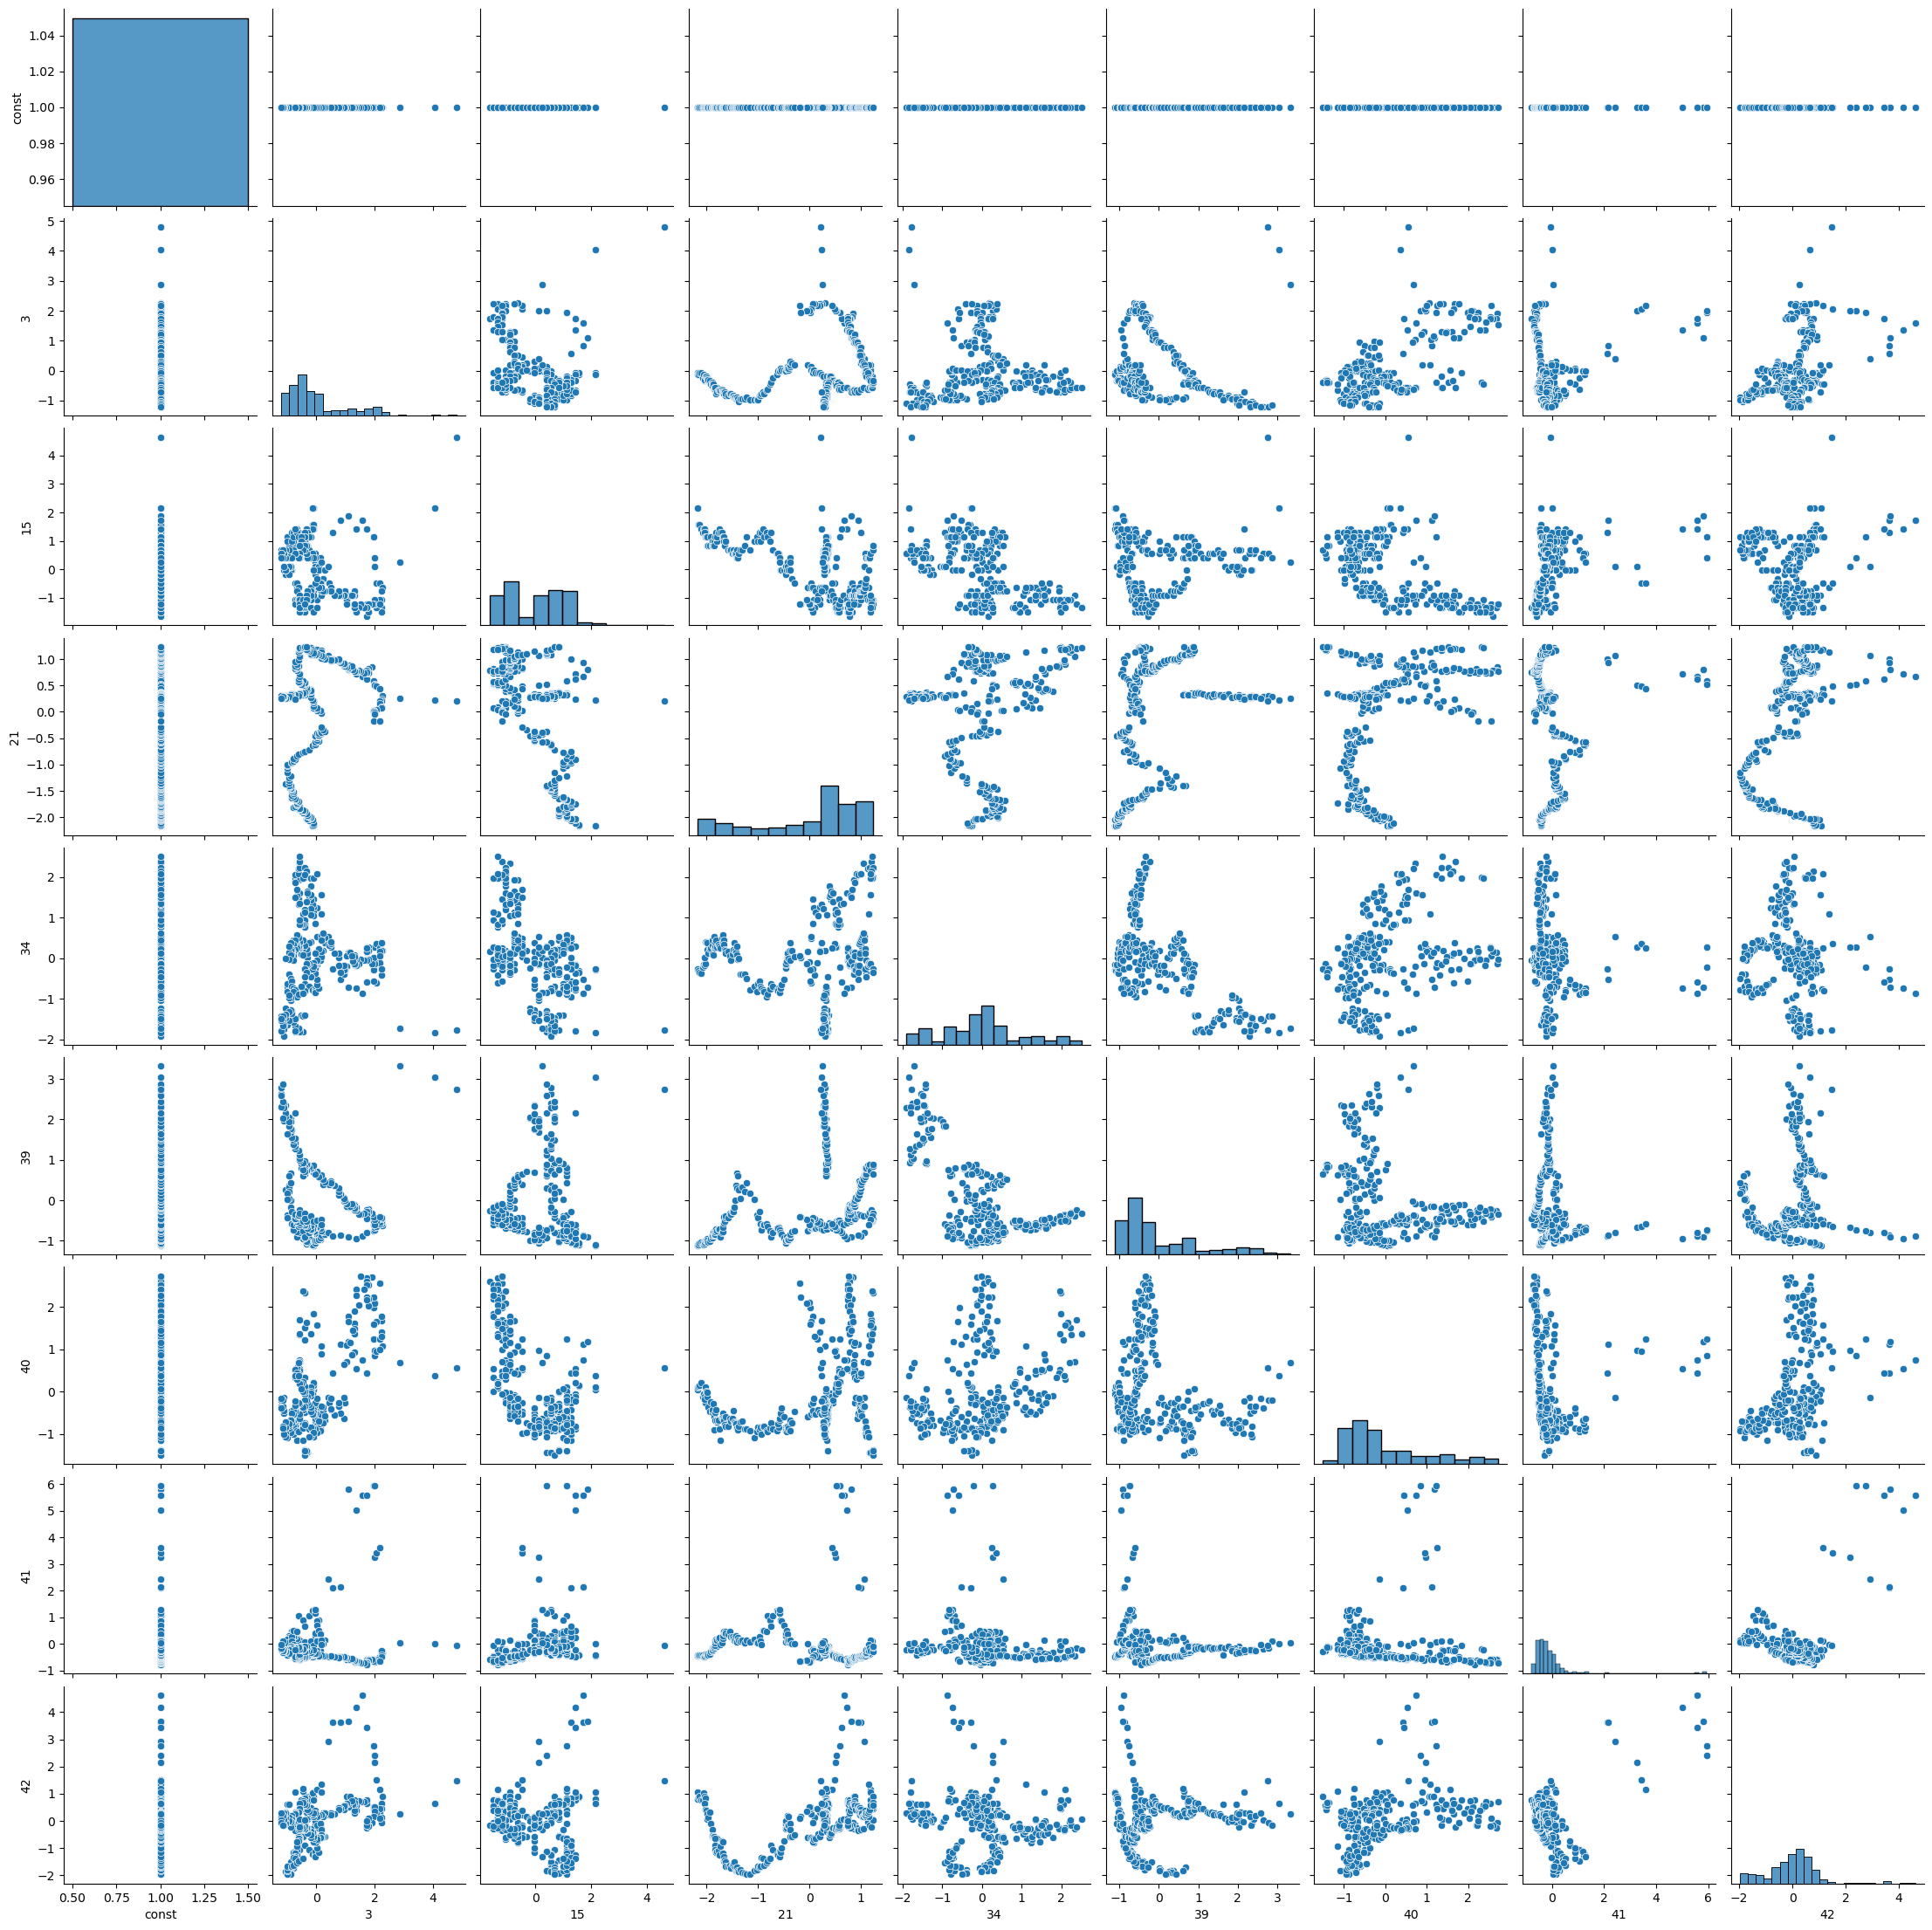

In [7]:
sns.pairplot(M_Output) #correlation matrix with scatter plots 
plt.show()
plt.close()

In [8]:
X=M_Output
y=df["Regime in 0 = Normal & 1 = Recession"]

# train and test split 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .6, stratify=y)
print(X_train.size) #train and test split
print(X_test.size)

1575
1062


In [10]:
print('Observations in train data:', len(X_train))
print('Observations in test data:', len(X_test))

Observations in train data: 175
Observations in test data: 118


In [11]:
Data_for_MLR=pd.concat([X_train, y_train], axis=1)
Data_for_MLR #matrix we use for the multiple logistic regression

,const,3,15,21,34,39,40,41,42,Regime in 0 = Normal & 1 = Recession
238,1.0,-0.402152,1.131470,0.346918,-0.448472,0.829931,-1.397981,-0.130052,0.672971,0
250,1.0,-0.562757,0.545485,0.349574,-1.740730,1.045145,-0.530184,-0.126511,0.460892,0
288,1.0,-1.205177,0.398989,0.258267,-1.497590,2.582781,-0.154215,-0.020992,0.301833,0
75,1.0,0.079663,-0.040499,-0.558176,-0.734031,-0.804364,-0.521101,0.893692,-1.156211,0
117,1.0,-0.402152,-1.358964,0.558258,0.776535,-0.536219,0.121446,-0.483766,-0.201855,0
...,...,...,...,...,...,...,...,...,...,...
18,1.0,-0.455687,0.838478,-1.883299,0.437693,-0.850854,-0.429517,-0.138610,-0.572993,0
51,1.0,-1.044572,0.545485,-1.376356,-0.012891,0.265295,-0.827227,0.137569,-1.871977,0
210,1.0,0.775618,-0.919475,0.959844,-0.177397,0.131964,-0.301768,-0.518420,0.487402,0
164,1.0,2.274598,-0.626483,0.300479,0.188346,-0.628643,1.062509,-0.332422,0.885050,0


In [12]:
Data_for_MLR.columns =['constant', 'ISRATIO', 'DTCTHFNM', 'EXUSUK',"SP500","NASDAQ","GOLDBAR","P/E","Dividend Yield","Recession_Index"] 

In [13]:
import statsmodels.api as sm
Xtrain = Data_for_MLR.drop("Recession_Index", axis = 1)
ytrain = Data_for_MLR["Recession_Index"]

# Multiple logistic regression

In [14]:
log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.147950
         Iterations 9


In [15]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:        Recession_Index   No. Observations:                  175
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            8
Date:                Tue, 31 Jan 2023   Pseudo R-squ.:                  0.5534
Time:                        18:34:24   Log-Likelihood:                -25.891
converged:                       True   LL-Null:                       -57.980
Covariance Type:            nonrobust   LLR p-value:                 7.016e-11
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
constant          -3.8314      0.640     -5.988      0.000      -5.085      -2.577
ISRATIO           -0.4317      0.575     -0.750      0.453      -1.560       0.696
DTCTHFNM           3.5747      1.230

In [16]:
print(log_reg.params)

constant         -3.831386
ISRATIO          -0.431698
DTCTHFNM          3.574702
EXUSUK            1.860218
SP500             1.497276
NASDAQ            0.840720
GOLDBAR           2.309926
P/E               0.331975
Dividend Yield   -0.105464
dtype: float64


# Odds ratio

In [17]:
ExpBeta=np.exp(log_reg.params)
ExpBeta

constant           0.021680
ISRATIO            0.649406
DTCTHFNM          35.684003
EXUSUK             6.425137
SP500              4.469499
NASDAQ             2.318036
GOLDBAR           10.073675
P/E                1.393718
Dividend Yield     0.899907
dtype: float64

# method 2 : PCA

In [18]:
Non_Financial_idx =variables_tested[["UNRATE","USGOOD","USTPU","PAYEMS","RPI", "INDPRO","HOUST","PERMIT", "DPCERA3M086SBEA","AMTMNO", "AMTMTI"
                                ,"AMDMUO", "ACOGNO", "BUSINV", "ISRATIO"]]
Financial_idx = variables_tested[["M1SL","M2SL", "TOTRESNS", "BUSLOANS", "REALLN", "DTCTHFNM", "FEDFUNDS", "TB6MS", "GS5"
                             , "GS10", "EXSZUS", "EXCAUS", "EXUSUK", "WPSFD49207", "WPSID61", "CPIAUCSL","SP500","NASDAQ", "GOLDBAR", "P/E", "Dividend Yield" ]]
pca = PCA(n_components=8)
PCA_NFI = pca.fit_transform(Non_Financial_idx)
PCA_NFI = pd.DataFrame(PCA_NFI)
pca = PCA(n_components=8)
PCA_FI = pca.fit_transform(Financial_idx)
PCA_FI = pd.DataFrame(PCA_FI)

In [19]:
X2=pd.concat([PCA_FI,PCA_NFI],axis=1)
y2=df["Regime in 0 = Normal & 1 = Recession"]
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0, train_size = .6, stratify=y2)
Data_for_MLR=pd.concat([X2_train, y2_train], axis=1)

In [20]:
import statsmodels.api as sm
X2train = Data_for_MLR.drop("Regime in 0 = Normal & 1 = Recession", axis = 1)
y2train = Data_for_MLR["Regime in 0 = Normal & 1 = Recession"]
log_reg2 = sm.Logit(y2train, X2train).fit()

Optimization terminated successfully.
         Current function value: 0.342288
         Iterations 9


In [21]:
print(log_reg2.summary())

                                    Logit Regression Results                                    
Dep. Variable:     Regime in 0 = Normal & 1 = Recession   No. Observations:                  175
Model:                                            Logit   Df Residuals:                      159
Method:                                             MLE   Df Model:                           15
Date:                                  Tue, 31 Jan 2023   Pseudo R-squ.:                -0.03312
Time:                                          18:34:24   Log-Likelihood:                -59.900
converged:                                         True   LL-Null:                       -57.980
Covariance Type:                              nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0002   5.32e-05     -4.313      0.000      -0.000

In [22]:
ExpBeta2=np.exp(log_reg2.params)
ExpBeta2

0    0.999771
1    1.009450
2    0.996429
3    0.990921
4    1.018808
5    1.067239
6    1.013215
7    0.944017
0    0.999881
1    0.999982
2    0.999977
3    0.999451
4    1.000493
5    1.003498
6    0.992419
7    1.011412
dtype: float64

# ROC curves

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import numpy as np
import pandas as pd


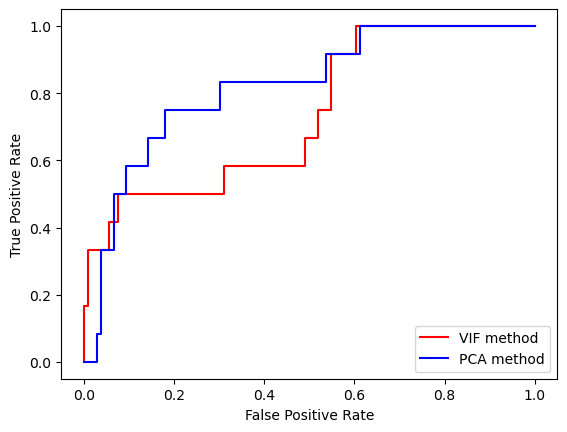

In [24]:
#define metrics
Y_pred_prob = log_reg.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred_prob)
Y2_pred_prob = log_reg2.predict(X2_test)
fpr2, tpr2, _ = metrics.roc_curve(y2_test,  Y2_pred_prob)

#create ROC curve
plt.plot(fpr, tpr, 'r', label = "VIF method") # plotting t, a separately 
plt.plot(fpr2, tpr2, 'b', label = "PCA method") # plotting t, b separately 
plt.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
